# Экспериментальное исследование алгоритмов решения задачи достижимости с КС ограничениями

### Постановка задачи:
Задача посвящена анализу производительности различных алгоритмов решения задачи достижимости между всеми парами вершин с контекстно-свободными ограничениями: алгоритма Хеллингса, матричного алгоритма, тензорного алгоритма и алгоритма на основе GLL.

Для решения поставленной задачи необходимо ответить на следующие вопросы:
- Какой из трёх указанных алгоритмов обладает лучшей производительностью?
- Имеет ли смысл для решения задачи достижимости с регулярными ограничениями использовать алгоритмы для КС ограничений (ведь регулярные --- частный случай КС) или всё же лучше использовать специализированные алгоритмы для регулярных ограничений?
- Как влияет грамматика на производительность тензорного алгоритма и алгоритма на основе GLL? Если зафиксировать язык, то как свойства грамматики (размер, (не)однозначность) влияют на производительность.

### Исследуемые решения
В работе сравнивались следующие алгоритмы:
1) def hellings_based_cfpq(cfg: pyformlang.cfg.CFG, graph: nx.DiGraph, start_nodes: set[int] = None, final_nodes: set[int] = None,) -> set[tuple[int, int]]
- алгоритм Хеллингса решения задачи достижимости. Перед началом работы алгоритма, грамматика переводится в ОНФХ. Отдельно храним не рассмотренные ребра. Каждое нерассмотренное ребро проверяем на порождаемость со смежными; в случае успеха, сохраняем данную пару ребер вместе с соответствующим нетерминалом.
2) def matrix_based_cfpq(cfg: pyformlang.cfg.CFG, graph: nx.DiGraph, start_nodes: Set[int] = None, final_nodes: Set[int] = None,) -> set[tuple[int, int]]
- матричный алгоритм решения задачи достижимости. Перед началом работы алгоритма, грамматика переводится в ОНФХ, далее строится матрица смежности графа, элементами которой являются множества нетерминалов из которых выводимы пути между соответствующими вершинами. Далее возводим матрицу в квадрат и прибавляем её к изначальной. Производим эту операци до тех пор, пока она не перестанет меняться. На этом этапе получили множество всех путей. Далее можем найти множество путей из стартовых вершин в финальные.
3) def tensor_based_cfpq(rsm: rsa.RecursiveAutomaton, graph: nx.DiGraph, start_nodes: Set[int] | None = None, final_nodes: Set[int] | None = None, matrix_type=sp.csr_matrix,
) -> Set[Tuple[int, int]]
- Тензорный алгоритм решения задачи достижимости. Перед началом работы алгоритма, по грамматике строится рекурсивный конечный автомат. Далее строится пересечение RSM и графа с использованием тензорного произведения. После строится транзитивное замыкание получившегося пересечения, ребра которого добавляются в графах. Процесс повторяется до тех пор, пока мы не перестанем находить новые ребра.
4) def gll_based_cfpq(rsm: rsa.RecursiveAutomaton, graph: nx.DiGraph, start_nodes: Set[int] = None, final_nodes: Set[int] = None,) -> Set[Tuple[int, int]]
- GLL алгоритм решения задачи достижимости. Перед началом работы алгоритма, по грамматике строится RSM. Алгоритм анализирует граф, начиная с начальных состояний автомата, и обрабатывает терминальные и нетерминальные переходы для нахождения достижимых пар узлов. В процессе используется графо-структурированный стек (GSS), который строится рекурсивно, с учетом всех возможных переходов, пока не будут найдены все пары узлов, которые соответствуют стартовым и конечным условиям задачи.

В силу того, что в этом эксперименте требуется выяснить, какой из алгоритмов лучше справляется с решением задачи достижимости между всеми парами вершин, для ответа на второй вопрос был выбран тензорный алгоритм tensor_based_rpq, т.к. в эксперименте для пятой задачи он показал себя лучше, чем матричный алгоритм в ходе решения аналогичной задачи.

Описание набора данных для экспериментов
Графы
Для эксперемента были выбраны следующие графы из CFPQ_Data

RDF-графы: funding, skos
Графы языка C: bzip,wc
Граф языка Java: lusearch


### Набор данных для эксперимента:
Из [набора](https://formallanguageconstrainedpathquerying.github.io/CFPQ_Data/graphs/index.html) были взяты следующие графы:
- RDF-графы:
    1) funding 778 nodes, 1086 edges;
    2) skos 144 nodes, 252 edges;
- C
    1) bzip 632 nodes 556 edges
    2) wc 332 nodes 269 edges

Выбор обусловлен необходимостью провести эксперимент на графах из разных областей. Графы с размером больше 1100 ребер не были рассмотрены, была предпринята попытка провести замеры также на графе lusearch(15774 узлов, 14994 ребер), в основе которого лежит анализ Java программ. Но спустя 17 часов работы программы эксперимент так и не завершился, поэтому от него пришлось отказаться.

### Запросы и регулярные выражения:
Для каждого графа были выбраны следующие КС-запросы:

#### Для графов RDF

- S -> subClassOf_r S subClassOf | subClassOf_r subClassOf | type_r S type | type_r type
- S -> subClassOf_r S subClassOf | subClassOf_r subClassOf
- S -> type_r S type | type_r type

#### Для графов языка C

- S -> d_r V d
- V -> V1 V2 V3
- V1 -> epsilon
- V1 -> V2 a_r V1
- V2 -> epsilon
- V2 -> S
- V3 -> epsilon
- V3 -> a V2 V3

#### Для графов языка Java

- S -> PTh alloc
- PTh -> epsilon
- PTh -> assign PTh
- PTh -> load_0 Al store_0 PTh
- PTh -> load_1 Al store_1 PTh
- FT -> alloc_r FTh
- FTh -> epsilon
- FTh -> assign_r FTh
- FTh -> store_0_r Al load_0_r FTh
- FTh -> store_1_r Al load_1_r FTh
- Al -> S FT

#### Для ответа на второй вопрос были выбраны следующие регулярные запросы:

- (l1 | l2)* l3
- (l3 | l4)+ l1*
- l1 l2 l3 (l4|l1)*
- (l1 l2) | l2*


## Описание эксперимента
### Оборудование

Процессор: Apple Silicon M1 (8 ядер, 4x Firestorm + 4x Icestorm cores)

Кэш: L1 - 256 KB, L2 - 16 MB общий (12 МБ - Firestorm, 4 МБ - Icestorm), L3 - 16 MБ

Оперативная память - 16 GB

ОС - MacOS Sequoia 15.3

Python 3.12.5

## Проведение эксперимента

1) Для ответа на первый вопрос для графа из каждой группы запускаем все 4 алгоритма на каждом из выбранных запросов. Количество запусков
 20, из которых бралось среднее время работы и стандартное отклонение.

2) Для ответа на второй вопрос, для каждого графа два выбранных алгоритма запускаются на каждом регулярном выражении. Алгоритмы также запускаются 20 раз, чтобы получить среднее время выполнения для каждого количества стартовых вершин.

3) Для ответа на третий вопрос, выбранные грамматики расширяются и преобразуются в неоднозначные, далее для графа из каждой группы запускаем все 4 алгоритма на каждом из выбранных запросов. Количество запусков 20, из которых бралось среднее время работы и стандартное отклонение, после чего результат сравнивается с результатом, полученным для первого вопроса.



In [6]:
import pandas as pd
import logging
import matplotlib.pyplot as plt
import time
import cfpq_data
import warnings
import networkx as nx

import numpy as np
from collections import Counter

from pyformlang.cfg import CFG
from pyformlang.regular_expression import Regex
from scipy.sparse import SparseEfficiencyWarning
from project.hw3.AdjacencyMatrixFA import tensor_based_rpq
from project.hw8.tensor_based_cfpq import tensor_based_cfpq
from project.hw6.hellings_cfpq import hellings_based_cfpq, cfg_to_weak_normal_form
from project.hw7.matrix_cfpq import matrix_based_cfpq
from project.tools.rsm_tools import cfg_to_rsm
from project.hw9.gll_based_cfpq import gll_based_cfpq
from project.hw1.graph_builder import load_graph, get_graph

logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
warnings.filterwarnings("ignore", category=SparseEfficiencyWarning)
cfpq_data.logging.disable()

#### Инициализация грамматик и регулярных запросов, и всего прочего, что пригодится в эксперименте:


In [2]:
rdf_cfg = [
    CFG.from_text("""
        S -> subClassOf_r S subClassOf | subClassOf_r subClassOf | type_r S type | type_r type
    """),
    CFG.from_text("""
        S -> subClassOf_r S subClassOf | subClassOf_r subClassOf
    """),
    CFG.from_text("""
        S -> type_r S type | type_r type
    """),
]

c_cfg = [
    CFG.from_text("""
        S -> d_r V d
        V -> V1 V2 V3
        V1 -> epsilon
        V1 -> V2 a_r V1
        V2 -> epsilon
        V2 -> S
        V3 -> epsilon
        V3 -> a V2 V3
    """)
]

def init_graphs(names: list[str]) -> list[nx.Graph]:
    graphs = []
    for name in names:
        graph = get_graph(name)
        cfpq_data.graphs.add_reverse_edges(graph)
        graph.name = name
        graphs.append(graph)
    return graphs


GRAPHS_RDF = init_graphs(["skos", "funding"])
GRAPHS_C = init_graphs(["bzip", "wc"])
# GRAPHS_JAVA = init_graphs(["lusearch"])

GRAPHS: list[nx.Graph] = sorted(
    # GRAPHS_RDF + GRAPHS_C + GRAPHS_JAVA, key=lambda g: g.number_of_edges()
    GRAPHS_RDF + GRAPHS_C, key=lambda g: g.number_of_edges()

)

# graph_names = ["skos", "funding", "bzip", "wc", "lusearch"]
graph_names = ["skos", "funding", "bzip", "wc"]


def build_most_common_labels(four_frequent_labels):
    l1 = str(four_frequent_labels[0])
    l2 = str(four_frequent_labels[1])
    l3 = str(four_frequent_labels[2])
    l4 = str(four_frequent_labels[3])
    reg_exps = [
        Regex(f"({l1}|{l2})* {l3}"),
        Regex(f"({l3}|{l4})+ {l1}*"),
        Regex(f"{l1} {l2} {l3} ({l4}|{l1})*"),
        Regex(f"({l1}{l2})| {l2}*"),
    ]
    return [(reg_exp, reg_exp.to_cfg()) for reg_exp in reg_exps]

### Первый вопрос: Какой из трёх указанных алгоритмов обладает лучшей производительностью?

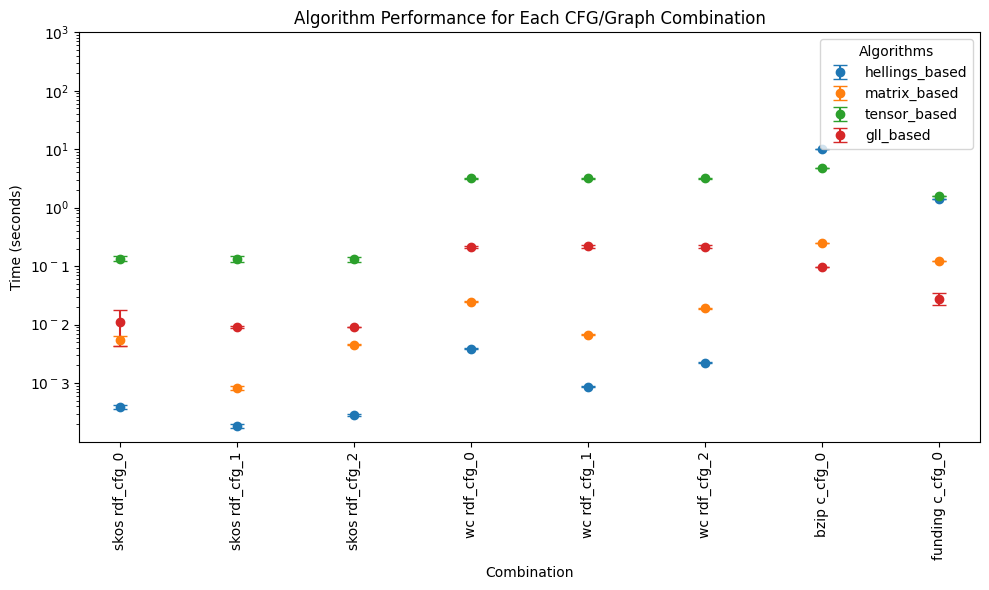

In [3]:
def run_algorithms(cfg, graph, start_nodes={}, final_nodes={}):
    results = {}

    start = time.perf_counter()
    results["hellings_based"] = hellings_based_cfpq(
        cfg, graph, start_nodes, final_nodes
    )
    results["hellings_based_time"] = time.perf_counter() - start

    start = time.perf_counter()
    results["matrix_based"] = matrix_based_cfpq(cfg, graph, start_nodes, final_nodes)
    results["matrix_based_time"] = time.perf_counter() - start

    start = time.perf_counter()
    results["tensor_based"] = tensor_based_cfpq(
        cfg_to_rsm(cfg), graph, start_nodes, final_nodes
    )
    results["tensor_based_time"] = time.perf_counter() - start

    start = time.perf_counter()
    results["gll_based"] = gll_based_cfpq(
        cfg_to_rsm(cfg), graph, start_nodes, final_nodes
    )
    results["gll_based_time"] = time.perf_counter() - start

    return results


combinations = [
    (rdf_cfg[0], GRAPHS_RDF[0], "skos rdf_cfg_0"),
    (rdf_cfg[1], GRAPHS_RDF[0], "skos rdf_cfg_1"),
    (rdf_cfg[2], GRAPHS_RDF[0], "skos rdf_cfg_2"),
    (rdf_cfg[0], GRAPHS_RDF[1], "wc rdf_cfg_0"),
    (rdf_cfg[1], GRAPHS_RDF[1], "wc rdf_cfg_1"),
    (rdf_cfg[2], GRAPHS_RDF[1], "wc rdf_cfg_2"),
    (c_cfg[0], GRAPHS_C[0], "bzip c_cfg_0"),
    (c_cfg[0], GRAPHS_C[1], "funding c_cfg_0"),
    # (java_cfg[0], GRAPHS_JAVA[0], "lusearch java_cfg_0"),
]

results_dict = {}

num_runs = 20

for cfg, graph, name in combinations:
    all_results = {
        algorithm: []
        for algorithm in ["hellings_based", "matrix_based", "tensor_based", "gll_based"]
    }

    for _ in range(num_runs):
        result = run_algorithms(cfg, graph)

        for algorithm in all_results.keys():
            all_results[algorithm].append(result.get(f"{algorithm}_time", None))

    avg_std_results = {
        algorithm: {
            "average": np.mean(all_results[algorithm]),
            "std_dev": np.std(all_results[algorithm]),
        }
        for algorithm in all_results.keys()
    }

    results_dict[name] = avg_std_results

data = []
for name, result in results_dict.items():
    for algorithm in ["hellings_based", "matrix_based", "tensor_based", "gll_based"]:
        data.append(
            {
                "Combination": name,
                "Algorithm": algorithm,
                "Average Time (seconds)": result[algorithm]["average"],
                "Std Dev (seconds)": result[algorithm]["std_dev"],
            }
        )

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))

for algorithm in ["hellings_based", "matrix_based", "tensor_based", "gll_based"]:
    algorithm_data = df[df["Algorithm"] == algorithm]
    plt.errorbar(
        algorithm_data["Combination"],
        algorithm_data["Average Time (seconds)"],
        yerr=algorithm_data["Std Dev (seconds)"],
        fmt="o",
        label=algorithm,
        capsize=5,
        markersize=6,
    )

plt.xlabel("Combination")
plt.ylabel("Time (seconds)")
plt.title("Algorithm Performance for Each CFG/Graph Combination")
plt.yscale("log")
plt.yticks([10**i for i in range(-3, 4)], [f"$10^{i}$" for i in range(-3, 4)])
plt.xticks(rotation=90)
plt.legend(title="Algorithms")
plt.tight_layout()
plt.show()

На графах малых размеров (bzip и scos) алгоритм Хеллингса показал лучшую производительность, но при росте количества узлов и ребер (в данном случае, начиная с 632 узлов) он начинает проигрывать. Это обуславливается тем, что с определенного момента явный обход всех узлов графа становится гораздо более затратным по времени, чем инициализация булевой декомпозиции и дальнейшее перемножение матриц или работа с GSS, но на графах малого размера использование этого алгоритма имеет смысл.

Матричный алгоритм, и алгоритм GLL выглядят наиболее устойчивыми к размеру графа, их время работы в 10 раз больше, чем у Хеллингса на графах малых размеров, но при росте количества узлов и ребер, они начинают выигрывать.

Хуже всех себя показал тензорный алгоритм решения задачи достижимости, он в сто раз медленнее Хеллингса на малых графах, и в десять раз медленнее матричного с GLL, но быть может, если преобразовать грамматику в WCNF, то он заработает лучше.

Вариант тензорного с WCNF


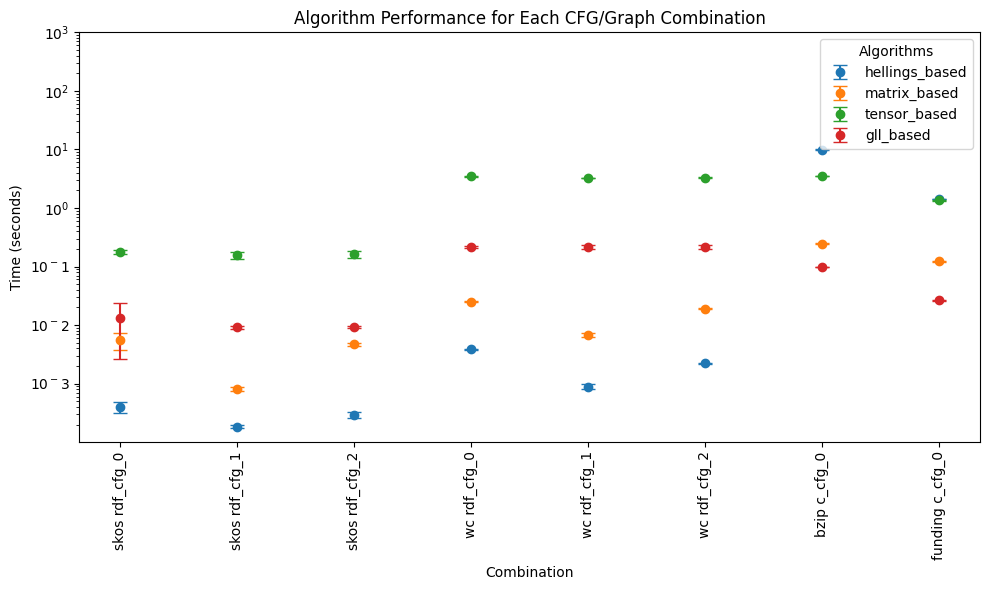

In [7]:
def run_algorithms(cfg, graph, start_nodes={}, final_nodes={}):
    results = {}

    start = time.perf_counter()
    results["hellings_based"] = hellings_based_cfpq(
        cfg, graph, start_nodes, final_nodes
    )
    results["hellings_based_time"] = time.perf_counter() - start

    start = time.perf_counter()
    results["matrix_based"] = matrix_based_cfpq(cfg, graph, start_nodes, final_nodes)
    results["matrix_based_time"] = time.perf_counter() - start

    start = time.perf_counter()
    results["tensor_based"] = tensor_based_cfpq(
        cfg_to_rsm(cfg_to_weak_normal_form(cfg)), graph, start_nodes, final_nodes
    )
    results["tensor_based_time"] = time.perf_counter() - start

    start = time.perf_counter()
    results["gll_based"] = gll_based_cfpq(
        cfg_to_rsm(cfg), graph, start_nodes, final_nodes
    )
    results["gll_based_time"] = time.perf_counter() - start

    return results


combinations = [
    (rdf_cfg[0], GRAPHS_RDF[0], "skos rdf_cfg_0"),
    (rdf_cfg[1], GRAPHS_RDF[0], "skos rdf_cfg_1"),
    (rdf_cfg[2], GRAPHS_RDF[0], "skos rdf_cfg_2"),
    (rdf_cfg[0], GRAPHS_RDF[1], "wc rdf_cfg_0"),
    (rdf_cfg[1], GRAPHS_RDF[1], "wc rdf_cfg_1"),
    (rdf_cfg[2], GRAPHS_RDF[1], "wc rdf_cfg_2"),
    (c_cfg[0], GRAPHS_C[0], "bzip c_cfg_0"),
    (c_cfg[0], GRAPHS_C[1], "funding c_cfg_0"),
    # (java_cfg[0], GRAPHS_JAVA[0], "lusearch java_cfg_0"),
]

results_dict = {}

num_runs = 20

for cfg, graph, name in combinations:
    all_results = {
        algorithm: []
        for algorithm in ["hellings_based", "matrix_based", "tensor_based", "gll_based"]
    }

    for _ in range(num_runs):
        result = run_algorithms(cfg, graph)

        for algorithm in all_results.keys():
            all_results[algorithm].append(result.get(f"{algorithm}_time", None))

    avg_std_results = {
        algorithm: {
            "average": np.mean(all_results[algorithm]),
            "std_dev": np.std(all_results[algorithm]),
        }
        for algorithm in all_results.keys()
    }

    results_dict[name] = avg_std_results

data = []
for name, result in results_dict.items():
    for algorithm in ["hellings_based", "matrix_based", "tensor_based", "gll_based"]:
        data.append(
            {
                "Combination": name,
                "Algorithm": algorithm,
                "Average Time (seconds)": result[algorithm]["average"],
                "Std Dev (seconds)": result[algorithm]["std_dev"],
            }
        )

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))

for algorithm in ["hellings_based", "matrix_based", "tensor_based", "gll_based"]:
    algorithm_data = df[df["Algorithm"] == algorithm]
    plt.errorbar(
        algorithm_data["Combination"],
        algorithm_data["Average Time (seconds)"],
        yerr=algorithm_data["Std Dev (seconds)"],
        fmt="o",
        label=algorithm,
        capsize=5,
        markersize=6,
    )

plt.xlabel("Combination")
plt.ylabel("Time (seconds)")
plt.title("Algorithm Performance for Each CFG/Graph Combination")
plt.yscale("log")
plt.yticks([10**i for i in range(-3, 4)], [f"$10^{i}$" for i in range(-3, 4)])
plt.xticks(rotation=90)
plt.legend(title="Algorithms")
plt.tight_layout()
plt.show()

Как оказалось, грамматика никак не повлияла на время работы алгоритма. Независимо от того, в CNF она или нет, тензорный алгоритм работает медленно. В среднем он в сто раз медленнее, чем алгоритм Хеллингса на малых графах. При резком росте количества вершин можно заметить, что алгоритм Хеллингса проигрывает тензорному около двух секунд, при условии, что количество узлов и ребер примерно одинаково, но Хеллингс на больших графах может и не проигрывать тензорному, при условии, что количество узлов меньше количества ребер хотя бы на 40 процентов.

Для ответа на первый вопрос я составил следующую таблицу с рейтингом алгоритмов на малых и больших графах. Чем ниже алгоритм, тем хуже его производительность.

|   | Большой граф(более 600 узлов) | Малый граф(менее 600 узлов) |
|---|-------------------------------|-----------------------------|
| 1 | GLL                           | Хеллингс                    |
| 2 | Матричный                     | Матричный                   |
| 3 | Тензорный                     | GLL                         |
| 4 | Хеллингс                      | Тензорный                   |


### Вопрос 2: Имеет ли смысл для решения задачи достижимости с регулярными ограничениями использовать алгоритмы для КС ограничений, или всё же лучше использовать специализированные алгоритмы для регулярных ограничений?

В связи с нехваткой меток у wc и bzip, для ответа на второй вопрос графы wc и bzip  заменены travel и wine.

В качестве CFPQ алгоритма был выбран GLL как наиболее производительный по результатам ответа на предыдущий вопрос.

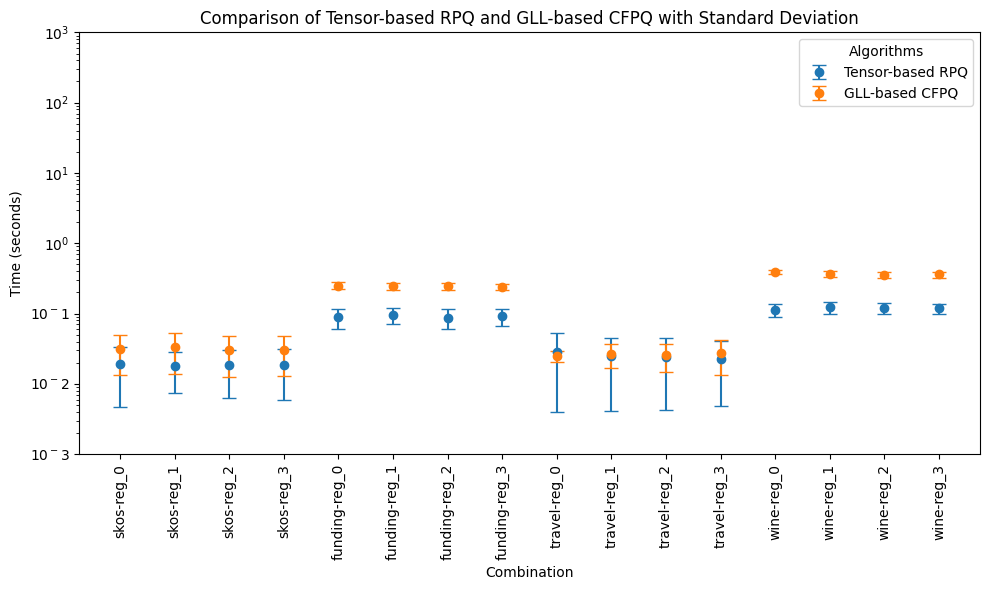

In [20]:
def run_algorithms_rpq_cfpq(cfg, graph, start_nodes={}, final_nodes={}):
    results = {}

    start = time.perf_counter()
    results["tensor_based"] = tensor_based_rpq(
        str(cfg), graph, start_nodes, final_nodes
    )
    results["tensor_based_time"] = time.perf_counter() - start

    start = time.perf_counter()
    results["gll_based"] = gll_based_cfpq(cfg_to_rsm(cfg_to_weak_normal_form(cfg)), graph, start_nodes, final_nodes)
    results["gll_based_time"] = time.perf_counter() - start

    return results


def regex_from_graph(graph_name):
    graph = get_graph(graph_name)
    most_common_labels = Counter(
        list(map(lambda node: node[2]["label"], graph.edges.data()))
    ).most_common(4)
    labels = [pair[0] for pair in most_common_labels]
    return build_most_common_labels(labels)


# graph_names = ["skos", "funding", "atom", "generations", "lusearch"]
graph_names = ["skos", "funding", "travel", "wine"]
num_runs = 20

results_dict = {}

for graph_name in graph_names:
    count = 0
    regexes = regex_from_graph(graph_name)

    all_times = {"tensor_based": [], "gll_based": []}

    for reg, cfg in regexes:
        for _ in range(num_runs):
            result = run_algorithms_rpq_cfpq(cfg, get_graph(graph_name))
            all_times["tensor_based"].append(result["tensor_based_time"])
            all_times["gll_based"].append(result["gll_based_time"])

        tensor_avg = np.mean(all_times["tensor_based"])
        tensor_std = np.std(all_times["tensor_based"])

        matrix_avg = np.mean(all_times["gll_based"])
        matrix_std = np.std(all_times["gll_based"])

        results_dict[f"{graph_name}-reg_{count}"] = {
            "tensor_based_avg": tensor_avg,
            "tensor_based_std": tensor_std,
            "gll_based_avg": matrix_avg,
            "gll_based_std": matrix_std,
        }

        count += 1

data = []
for name, result in results_dict.items():
    data.append(
        {
            "Combination": name,
            "Algorithm": "Tensor-based RPQ",
            "Average Time (seconds)": result["tensor_based_avg"],
            "Std Dev (seconds)": result["tensor_based_std"],
        }
    )
    data.append(
        {
            "Combination": name,
            "Algorithm": "GLL-based CFPQ",
            "Average Time (seconds)": result["gll_based_avg"],
            "Std Dev (seconds)": result["gll_based_std"],
        }
    )

df = pd.DataFrame(data)
plt.figure(figsize=(10, 6))

for algorithm in ["Tensor-based RPQ", "GLL-based CFPQ"]:
    algorithm_data = df[df["Algorithm"] == algorithm]
    plt.errorbar(
        algorithm_data["Combination"],
        algorithm_data["Average Time (seconds)"],
        yerr=algorithm_data["Std Dev (seconds)"],
        fmt="o",
        label=algorithm,
        capsize=5,
        markersize=6,
    )

plt.xlabel("Combination")
plt.ylabel("Time (seconds)")
plt.title(
    "Comparison of Tensor-based RPQ and GLL-based CFPQ with Standard Deviation"
)
plt.yscale("log")
plt.yticks([10**i for i in range(-3, 4)], [f"$10^{i}$" for i in range(-3, 4)])
plt.xticks(rotation=90)
plt.legend(title="Algorithms")
plt.tight_layout()
plt.show()

Как видно из графика, при росте размера графа разница в скорости между GLL и тензорным алгоритмами становится видна более явно, можно заметить, что на больших графах алгоритм GLL работает быстрее. При маленьких графах вычисления проходят очень быстро, и они каждый раз могут сильно разниться. Деление шкалы слева весьма мало, по этой причине на графике наблюдать большие "усики" у маленьких графов.

В конечном итоге можно сделать вывод, что нет смысла использовать тензорный алгоритм для решения задачи достижимости с регулярными ограничениями, при наличии алгоритма GLL.


### Вопрос 3: Как влияет грамматика на производительность тензорного алгоритма и алгоритма на основе GLL? Если зафиксировать язык, то как свойства грамматики (размер, (не)однозначность) влияют на производительность.



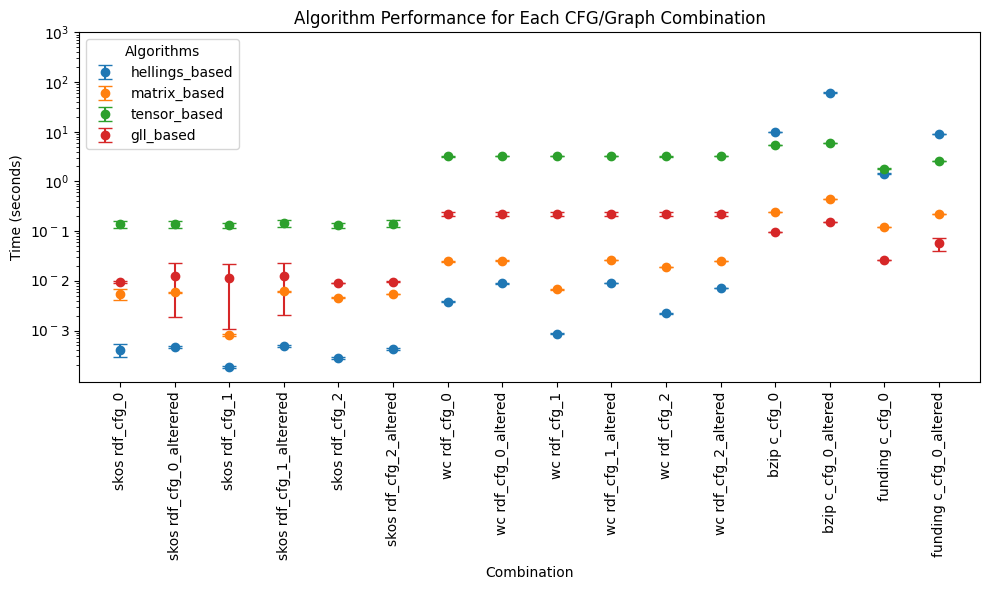

In [22]:
rdf_cfg_altered = [
    CFG.from_text("""
        S -> subClassOf_r S subClassOf | subClassOf_r subClassOf | type_r S type | type_r type | subClassOf_r S subClassOf subClassOf | type_r S type subClassOf
    """),
    CFG.from_text("""
        S -> subClassOf_r S subClassOf | subClassOf_r subClassOf | type_r S type | type_r type | subClassOf_r S subClassOf subClassOf | type_r S type subClassOf | type_r subClassOf subClassOf_r type
    """),
    CFG.from_text("""
        S -> subClassOf_r S subClassOf | subClassOf_r subClassOf | type_r S type | type_r type | type_r type subClassOf | subClassOf_r S type
    """),
]

c_cfg_altered = [
    CFG.from_text("""
        S -> d_r V d | V d | d_r V d V
        V -> V1 V2 V3 | V1 V2 V3 V
        V1 -> epsilon | V2 a_r V1 | a_r V1
        V2 -> epsilon | S | V3
        V3 -> epsilon | a V2 V3 | V1 a_r V3
    """)
]


def run_algorithms(cfg, graph, start_nodes={}, final_nodes={}):
    results = {}

    start = time.perf_counter()
    results["hellings_based"] = hellings_based_cfpq(
        cfg, graph, start_nodes, final_nodes
    )
    results["hellings_based_time"] = time.perf_counter() - start

    start = time.perf_counter()
    results["matrix_based"] = matrix_based_cfpq(cfg, graph, start_nodes, final_nodes)
    results["matrix_based_time"] = time.perf_counter() - start

    start = time.perf_counter()
    results["tensor_based"] = tensor_based_cfpq(
        cfg_to_rsm(cfg), graph, start_nodes, final_nodes
    )
    results["tensor_based_time"] = time.perf_counter() - start

    start = time.perf_counter()
    results["gll_based"] = gll_based_cfpq(
        cfg_to_rsm(cfg), graph, start_nodes, final_nodes
    )
    results["gll_based_time"] = time.perf_counter() - start

    return results


combinations = [
    (rdf_cfg[0], GRAPHS_RDF[0], "skos rdf_cfg_0"),
    (rdf_cfg_altered[0], GRAPHS_RDF[0], "skos rdf_cfg_0_alterered"),
    (rdf_cfg[1], GRAPHS_RDF[0], "skos rdf_cfg_1"),
    (rdf_cfg_altered[1], GRAPHS_RDF[0], "skos rdf_cfg_1_alterered"),
    (rdf_cfg[2], GRAPHS_RDF[0], "skos rdf_cfg_2"),
    (rdf_cfg_altered[2], GRAPHS_RDF[0], "skos rdf_cfg_2_altered"),
    (rdf_cfg[0], GRAPHS_RDF[1], "wc rdf_cfg_0"),
    (rdf_cfg_altered[0], GRAPHS_RDF[1], "wc rdf_cfg_0_altered"),
    (rdf_cfg[1], GRAPHS_RDF[1], "wc rdf_cfg_1"),
    (rdf_cfg_altered[1], GRAPHS_RDF[1], "wc rdf_cfg_1_altered"),
    (rdf_cfg[2], GRAPHS_RDF[1], "wc rdf_cfg_2"),
    (rdf_cfg_altered[2], GRAPHS_RDF[1], "wc rdf_cfg_2_altered"),
    (c_cfg[0], GRAPHS_C[0], "bzip c_cfg_0"),
    (c_cfg_altered[0], GRAPHS_C[0], "bzip c_cfg_0_altered"),
    (c_cfg[0], GRAPHS_C[1], "funding c_cfg_0"),
    (c_cfg_altered[0], GRAPHS_C[1], "funding c_cfg_0_altered"),
    # (java_cfg[0], GRAPHS_JAVA[0], "lusearch java_cfg_0"),
]

results_dict = {}

num_runs = 20

for cfg, graph, name in combinations:
    all_results = {
        algorithm: []
        for algorithm in ["hellings_based", "matrix_based", "tensor_based", "gll_based"]
    }

    for _ in range(num_runs):
        result = run_algorithms(cfg, graph)

        for algorithm in all_results.keys():
            all_results[algorithm].append(result.get(f"{algorithm}_time", None))

    avg_std_results = {
        algorithm: {
            "average": np.mean(all_results[algorithm]),
            "std_dev": np.std(all_results[algorithm]),
        }
        for algorithm in all_results.keys()
    }

    results_dict[name] = avg_std_results

data = []
for name, result in results_dict.items():
    for algorithm in ["hellings_based", "matrix_based", "tensor_based", "gll_based"]:
        data.append(
            {
                "Combination": name,
                "Algorithm": algorithm,
                "Average Time (seconds)": result[algorithm]["average"],
                "Std Dev (seconds)": result[algorithm]["std_dev"],
            }
        )

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))

for algorithm in ["hellings_based", "matrix_based", "tensor_based", "gll_based"]:
    algorithm_data = df[df["Algorithm"] == algorithm]
    plt.errorbar(
        algorithm_data["Combination"],
        algorithm_data["Average Time (seconds)"],
        yerr=algorithm_data["Std Dev (seconds)"],
        fmt="o",
        label=algorithm,
        capsize=5,
        markersize=6,
    )

plt.xlabel("Combination")
plt.ylabel("Time (seconds)")
plt.title("Algorithm Performance for Each CFG/Graph Combination")
plt.yscale("log")
plt.yticks([10**i for i in range(-3, 4)], [f"$10^{i}$" for i in range(-3, 4)])
plt.xticks(rotation=90)
plt.legend(title="Algorithms")
plt.tight_layout()
plt.show()


Если проводить сравнение текущих результатов, и результатов ответа на первый вопрос, то можно заметить, что время работы алгоритма Хеллингса в худшем случае на графе bzip замедлилось в 10 раз. И таким образом на его работу повлияла только грамматика.

В частных случая неоднозначность может помочь, например, с неоднозначной грамматикой

S -> A S1 | eps | A B;

S1 -> S S2;

S2 ->

B S мы раньше найдем путь в графе 0 -[A]> 1 -[B]> 2 из 0 в 2 нежели с однозначной грамматикой

S -> A S1 | eps;

S1 -> S S2;

S2 -> B S.

Однако, в общем случае, производительность будет меньше при увеличении размеров и неоднозначности грамматики

Если говорить про тензорный алгоритм, и алгоритм на основе GLL, то можно заметить, что изменение грамматики незначительно сказалось на их времени работы, лишь иногда на измененной грамматике алгоритмы работали медленнее, и замедление составляло не более 5 процентов. Причем тенденция к замедлению при усложнении грамматики прослеживается на одних и тех же графах, а именно bzip и funding. Это объясняется тем, что алгоритмы являются достаточно устойчивыми, и могут работать с КС грамматиками любого вида.